<a href="https://colab.research.google.com/github/Mahian-Hoq/Varsity_Work/blob/main/DS_424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# Create tensors
scalar = tf.constant(7)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)

Scalar: tf.Tensor(7, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Matrix: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
add = tf.add(vector , [9,8,7])
multiplication = tf.multiply(matrix,2)
reshp = tf.reshape(matrix, [4,1])

print(add.numpy(), '\n', multiplication.numpy(), '\n', reshp.numpy())

[10 10 10] 
 [[2 4]
 [6 8]] 
 [[1]
 [2]
 [3]
 [4]]


In [ ]:
import numpy as np

a= tf.constant([[1,2],[3,4]])
b= tf.constant([[.23 , .56], [.12 , .45]])
c = tf.convert_to_tensor(np.arange(12).reshape(3,4))

print(a)
print(b.shape, b.dtype)
print(c.numpy())

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
(2, 2) <dtype: 'float32'>
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
a= tf.constant([[1,2],[3,4]])
b = tf.constant([[5],[6]])

print('A = \n',a.numpy())
print('\nB = \n',b.numpy())
print('\nA + B = \n',(a+b).numpy())

print('Matrix multiplication A @ B =\n', tf.matmul(a,b).numpy())

A = 
 [[1 2]
 [3 4]]

B = 
 [[5]
 [6]]

A + B = 
 [[ 6  7]
 [ 9 10]]
Matrix multiplication A @ B =
 [[17]
 [39]]


In [ ]:
# Gradient example
x = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
  y = tf.reduce_sum(x ** 2)
dy_dx = tape.gradient(y, x)
print('dy/dx =', dy_dx.numpy())


dy/dx = [[2. 4.]
 [6. 8.]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

Loading Data

In [ ]:
(x_train, y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

The data was in 0 to 255 pixels. So here we converted them to 0 to 1 values

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Now we will build the nural networks. The layers.

In [ ]:
inputs = keras.Input(shape = (28,28), name = "Input_Layer")

In [ ]:
28*28

784

In [ ]:
x = layers.Flatten()(inputs)

In [ ]:
x = layers.Dense(128, activation= 'relu')(x)

In [ ]:
x = layers.Dropout(0.3)(x)

In [ ]:
x = layers.Dense(64, activation='relu')(x)

In [ ]:
outputs = layers.Dense(10 , activation = 'softmax', name= 'Output_Layer')(x)

Layers are done here

Now we will create the model with inputs and outputs.

In [ ]:
model  = keras.Model(inputs= inputs, outputs = outputs, name='Minist_Fuctional_Model')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
model.summary()

Model: "Minist_Fuctional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 64,
    validation_split = 0.2,
    verbose = 1
)

In [ ]:
test_ls, test_acc = model.evaluate(x_test, y_test, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0949


In [ ]:
import matplotlib.pyplot as plt

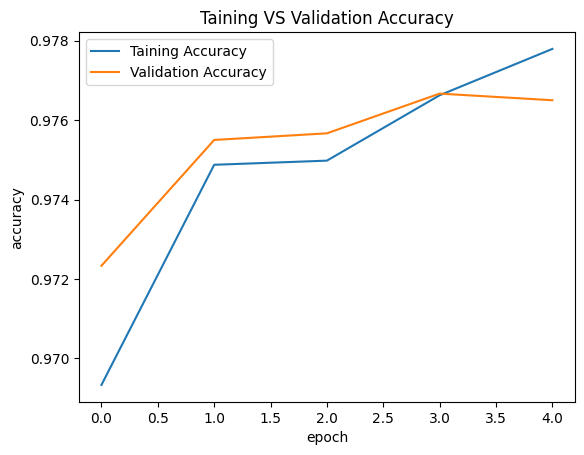

In [ ]:
plt.plot(history.history['accuracy'], label = 'Taining Accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation Accuracy')
plt.title('Taining VS Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()